###### The objective of this analysis is to identify the busiest metro stations based on the number of entrances per station according to an analysis of MTV data

In [3]:
import pandas as pd
import datetime

import seaborn as sns
import numpy as np
from functools import partial, reduce
from sqlalchemy import create_engine
import plotly.graph_objects as go
from sqlalchemy import create_engine

ModuleNotFoundError: No module named 'plotly'

In [ ]:
pwd

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210925 ,210918 ,210911 ,210904 ,210828 ,210821 ,210814 ,210807 ,210731 ,210724 ,210717 ,210710]
turnstiles_df = get_data_parse_dt(week_nums)

In [21]:
turnstiles_df.to_csv('data.csv',index=False)

In [30]:
turnstiles_df=pd.read_sql('SELECT * FROM data',connect)
turnstiles_df


,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,209683,2021-07-09 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
2514584,209684,2021-07-09 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
2514585,209685,2021-07-09 09:37:06,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
2514586,209686,2021-07-09 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


In [32]:
turnstiles_df


,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,209683,2021-07-09 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
2514584,209684,2021-07-09 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
2514585,209685,2021-07-09 09:37:06,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
2514586,209686,2021-07-09 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


##### CLEEN DATA

In [56]:
def format1(turnstiles_df):
    # Standardize column name 
    turnstiles_df.columns = turnstiles_df.columns.mta
        
    # Create DATETIME column from 'DATE' and 'TIME' cols
    turnstiles_df['DATETIME'] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                    format="%m/%d/%Y %H:%M:%S")
    
    # Create 'DOW' (Day of Week) column from 'DATETIME'
    turnstiles_df['DOW'] = turnstiles_df[['DATETIME']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATETIME'], '%A'), axis=1)
       
    # Drop unnecessary columns
    turnstiles_df = turnstiles_df.drop(['LINENAME', 'DIVISION', 'DATE', 'DESC','TIME'], axis=1) 

    return turnstiles_df

In [57]:
mta=format1(turnstiles_df)

In [58]:
mta

,index,DATE_TIME,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW
0,0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,7637026,2613455,2021-09-18 00:00:00,Saturday
1,1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,7637036,2613457,2021-09-18 04:00:00,Saturday
2,2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,7637047,2613478,2021-09-18 08:00:00,Saturday
3,3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,7637104,2613524,2021-09-18 12:00:00,Saturday
4,4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,7637236,2613561,2021-09-18 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...
2514583,209683,2021-07-09 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,585,2021-07-09 05:00:00,Friday
2514584,209684,2021-07-09 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,585,2021-07-09 09:00:00,Friday
2514585,209685,2021-07-09 09:37:06,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,585,2021-07-09 09:37:06,Friday
2514586,209686,2021-07-09 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,585,2021-07-09 13:00:00,Friday


In [59]:
mta.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW
0,0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,7637026,2613455,2021-09-18 00:00:00,Saturday
1,1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,7637036,2613457,2021-09-18 04:00:00,Saturday
2,2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,7637047,2613478,2021-09-18 08:00:00,Saturday
3,3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,7637104,2613524,2021-09-18 12:00:00,Saturday
4,4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,7637236,2613561,2021-09-18 16:00:00,Saturday


In [63]:
turnstiles_df.DATE.value_counts()

08/30/2021    30738
09/20/2021    30444
09/14/2021    30292
07/06/2021    30226
07/17/2021    30193
              ...  
08/29/2021    29754
07/07/2021    29726
09/02/2021    29664
08/27/2021    29537
09/03/2021    29534
Name: DATE, Length: 84, dtype: int64

In [64]:

mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOW
0,0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,Saturday
1,1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,Saturday
2,2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,Saturday
3,3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,Saturday
4,4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,Saturday


In [65]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOW
203595,203595,2021-09-18 00:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/18/2021,00:00:00,REGULAR,16068820,3553178,2021-09-18 00:00:00,Saturday
203596,203596,2021-09-18 04:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/18/2021,04:00:00,REGULAR,16068830,3553192,2021-09-18 04:00:00,Saturday
203597,203597,2021-09-18 08:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/18/2021,08:00:00,REGULAR,16068988,3553200,2021-09-18 08:00:00,Saturday
203598,203598,2021-09-18 12:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/18/2021,12:00:00,REGULAR,16069193,3553227,2021-09-18 12:00:00,Saturday
203599,203599,2021-09-18 20:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/18/2021,20:00:00,REGULAR,16069603,3553356,2021-09-18 20:00:00,Saturday


In [73]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,1
1676313,R139,R031,04-00-01,34 ST-PENN STA,2021-09-09 12:00:00,1
1676306,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 08:00:00,1
1676307,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 12:00:00,1
1676308,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 16:00:00,1


In [68]:
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATETIME"].dt.date == datetime.datetime(2016, 9, 16).date()))

turnstiles_df[mask].head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DOW


In [69]:
turnstiles_df.DESC.value_counts()

REGULAR       2501799
RECOVR AUD      12789
Name: DESC, dtype: int64

In [164]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME,DOW,ads_v
210399,210399,2021-09-24 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00,Friday,20:00 to 24:00
210398,210398,2021-09-24 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00,Friday,16:00 to 20:00
210397,210397,2021-09-24 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00,Friday,12:00 to 16:00
210396,210396,2021-09-24 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00,Friday,8:00 to 12:00
210395,210395,2021-09-24 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00,Friday,4:00 to 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304904,4,2021-07-03 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,Saturday,12:00 to 16:00
2304903,3,2021-07-03 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,Saturday,8:00 to 12:00
2304902,2,2021-07-03 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,Saturday,4:00 to 8:00
2304901,1,2021-07-03 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,Saturday,0:00 to 4:00


In [165]:
turnstiles_df

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME,DOW,ads_v
210399,210399,2021-09-24 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00,Friday,20:00 to 24:00
210398,210398,2021-09-24 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00,Friday,16:00 to 20:00
210397,210397,2021-09-24 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00,Friday,12:00 to 16:00
210396,210396,2021-09-24 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00,Friday,8:00 to 12:00
210395,210395,2021-09-24 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00,Friday,4:00 to 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304904,4,2021-07-03 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,Saturday,12:00 to 16:00
2304903,3,2021-07-03 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,Saturday,8:00 to 12:00
2304902,2,2021-07-03 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,Saturday,4:00 to 8:00
2304901,1,2021-07-03 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,Saturday,0:00 to 4:00


In [77]:
2514588-2514466

122

In [78]:

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,1
1676313,R139,R031,04-00-01,34 ST-PENN STA,2021-09-09 12:00:00,1
1676306,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 08:00:00,1
1676307,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 12:00:00,1
1676308,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 16:00:00,1


In [167]:
turnstiles_df = turnstiles_df.drop(["EXITS","DESC"], axis=1, errors="ignore")

In [168]:
turnstiles_df

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME,DOW,ads_v
210399,210399,2021-09-24 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,21:00:00,5554,2021-09-24 21:00:00,Friday,20:00 to 24:00
210398,210398,2021-09-24 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,5554,2021-09-24 17:00:00,Friday,16:00 to 20:00
210397,210397,2021-09-24 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,5554,2021-09-24 13:00:00,Friday,12:00 to 16:00
210396,210396,2021-09-24 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,5554,2021-09-24 09:00:00,Friday,8:00 to 12:00
210395,210395,2021-09-24 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,5554,2021-09-24 05:00:00,Friday,4:00 to 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304904,4,2021-07-03 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,7596572,2021-07-03 16:00:00,Saturday,12:00 to 16:00
2304903,3,2021-07-03 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,7596466,2021-07-03 12:00:00,Saturday,8:00 to 12:00
2304902,2,2021-07-03 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,7596422,2021-07-03 08:00:00,Saturday,4:00 to 8:00
2304901,1,2021-07-03 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,7596412,2021-07-03 04:00:00,Saturday,0:00 to 4:00


In [82]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "08/27/2016")]
turnstiles_daily = (turnstiles_df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
.ENTRIES.first())
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,7596715
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741


In [84]:

turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily.head()
turnstiles_daily.tail()

<ipython-input-84-66159e5d8cdd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
419603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,5554,09/19/2021,5554.0
419604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,5554,09/20/2021,5554.0
419605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,5554,09/21/2021,5554.0
419606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,5554,09/22/2021,5554.0
419607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,5554,09/23/2021,5554.0


In [85]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [87]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0
5,A002,R051,02-00-00,59 ST,07/08/2021,7599341,07/07/2021,7598741.0
...,...,...,...,...,...,...,...,...
419603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,5554,09/19/2021,5554.0
419604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,5554,09/20/2021,5554.0
419605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,5554,09/21/2021,5554.0
419606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,5554,09/22/2021,5554.0


In [91]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3277,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,885593112,07/03/2021,885593287.0
3278,A011,R080,01-03-00,57 ST-7 AV,07/05/2021,885592916,07/04/2021,885593112.0
3279,A011,R080,01-03-00,57 ST-7 AV,07/06/2021,885592645,07/05/2021,885592916.0
3280,A011,R080,01-03-00,57 ST-7 AV,07/07/2021,885592373,07/06/2021,885592645.0
3281,A011,R080,01-03-00,57 ST-7 AV,07/08/2021,885592062,07/07/2021,885592373.0


In [96]:
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()


  

AttributeError: Can only use .dt accessor with datetimelike values

In [97]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         83
A014  R081  02-00-00  49 ST               1
A049  R088  02-05-00  CORTLANDT ST       20
A066  R118  00-00-00  CANAL ST           83
A084  R125  01-03-02  BROAD ST            1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        83
R633  R068  00-00-01  VAN SICLEN AV       1
R646  R110  01-00-02  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    82
S101  R070  00-00-02  ST. GEORGE          5
Length: 190, dtype: int64

In [98]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

353 8049630.0
167790157 702266.0
310 5609562.0
35 9768753.0
33565227 188178.0
48 8724126.0
511 3272795.0
5946 4298704.0
0 117440512.0
327975 7577027.0
67109632 14.0
327682 67109640.0
15 67109632.0
36 1198448.0
46 5405351.0
200 705357551.0
16777220 1037157.0
6 16034831.0
386 6213955.0
37 1950780.0
443 15689395.0
8 1255797.0
5 11123659.0
256 3153907.0
126 3102523.0
19 2570919.0
50362839 251769.0
114 1953264.0
169 4788322.0
82 6249985.0
67 1040931923.0
197214 1890967.0
716 3145979.0
285 3530461.0
35 10737302.0
201331968 798740.0
154 5768873.0
1089962154 146746170.0
3539010 51735353.0
124 2030205.0
112 7682427.0
1189019240 3740789.0
346167 14045092.0
14051313 346213.0
774447 9475375.0
9482240 774522.0
7979566 789214.0
796277 7979671.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
113 1684097.0
327683 50346231.0
41 6481415.0
92 1383110115.0


In [99]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

353 8049630.0
167790157 702266.0
310 5609562.0
35 9768753.0
33565227 188178.0
48 8724126.0
511 3272795.0
5946 4298704.0
0 117440512.0
327975 7577027.0
67109632 14.0
327682 67109640.0
15 67109632.0
36 1198448.0
46 5405351.0
200 705357551.0
16777220 1037157.0
6 16034831.0
386 6213955.0
37 1950780.0
443 15689395.0
8 1255797.0
5 11123659.0
256 3153907.0
126 3102523.0
19 2570919.0
50362839 251769.0
114 1953264.0
169 4788322.0
82 6249985.0
67 1040931923.0
197214 1890967.0
716 3145979.0
285 3530461.0
35 10737302.0
201331968 798740.0
154 5768873.0
1089962154 146746170.0
3539010 51735353.0
124 2030205.0
112 7682427.0
1189019240 3740789.0
346167 14045092.0
14051313 346213.0
774447 9475375.0
9482240 774522.0
7979566 789214.0
796277 7979671.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
113 1684097.0
327683 50346231.0
41 6481415.0
92 1383110115.0


In [100]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0,363.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0,399.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0,604.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0,660.0
5,A002,R051,02-00-00,59 ST,07/08/2021,7599341,07/07/2021,7598741.0,600.0


In [143]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
419603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,5554,09/19/2021,5554.0,0.0
419604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,5554,09/20/2021,5554.0,0.0
419605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,5554,09/21/2021,5554.0,0.0
419606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,5554,09/22/2021,5554.0,0.0
419607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,5554,09/23/2021,5554.0,0.0


In [146]:
turnstiles_daily['STATION'].value_counts()

34 ST-PENN STA     8421
FULTON ST          7964
GRD CNTRL-42 ST    7501
23 ST              6059
86 ST              5393
                   ... 
MONTROSE AV         249
CYPRESS HILLS       249
PRESIDENT ST        246
SUTTER AV           166
CLEVELAND ST        166
Name: STATION, Length: 379, dtype: int64

In [101]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,07/04/2021,2544.0
1,A002,R051,59 ST,07/05/2021,3011.0
2,A002,R051,59 ST,07/06/2021,4848.0
3,A002,R051,59 ST,07/07/2021,5078.0
4,A002,R051,59 ST,07/08/2021,4964.0


In [102]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/04/2021,5794.0
1,1 AV,07/05/2021,6683.0
2,1 AV,07/06/2021,7456.0
3,1 AV,07/07/2021,7784.0
4,1 AV,07/08/2021,7863.0


In [141]:
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/04/2021,5794.0
1,1 AV,07/05/2021,6683.0
2,1 AV,07/06/2021,7456.0
3,1 AV,07/07/2021,7784.0
4,1 AV,07/08/2021,7863.0
...,...,...,...
31421,ZEREGA AV,09/20/2021,1408.0
31422,ZEREGA AV,09/21/2021,1428.0
31423,ZEREGA AV,09/22/2021,1463.0
31424,ZEREGA AV,09/23/2021,1433.0


In [103]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,JUNCTION BLVD,5521702.0
1,34 ST-PENN STA,4376365.0
2,FULTON ST,3697317.0
3,86 ST,3290897.0
4,PATH NEW WTC,3237909.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

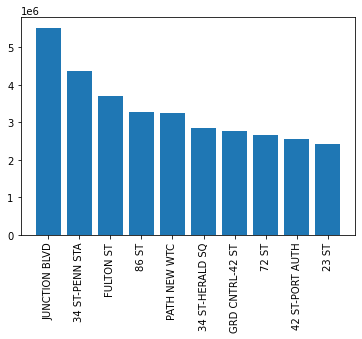

In [127]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

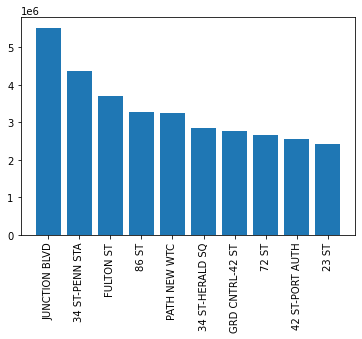

In [127]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

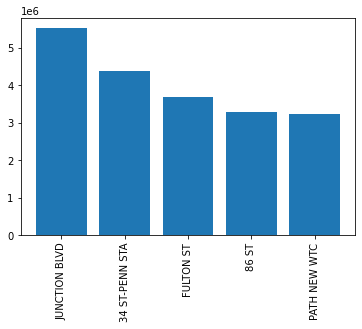

In [128]:
plt.bar(x=station_totals['STATION'][:5], height=station_totals['DAILY_ENTRIES'][:5])
plt.xticks(rotation=90)

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

In [105]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
2857,A011,R080,01-00-00,57 ST-7 AV,07/04/2021,496605,07/03/2021,496454.0,151.0
2858,A011,R080,01-00-00,57 ST-7 AV,07/05/2021,496724,07/04/2021,496605.0,119.0
2859,A011,R080,01-00-00,57 ST-7 AV,07/06/2021,496886,07/05/2021,496724.0,162.0
2860,A011,R080,01-00-00,57 ST-7 AV,07/07/2021,497089,07/06/2021,496886.0,203.0
2861,A011,R080,01-00-00,57 ST-7 AV,07/08/2021,497264,07/07/2021,497089.0,175.0


Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

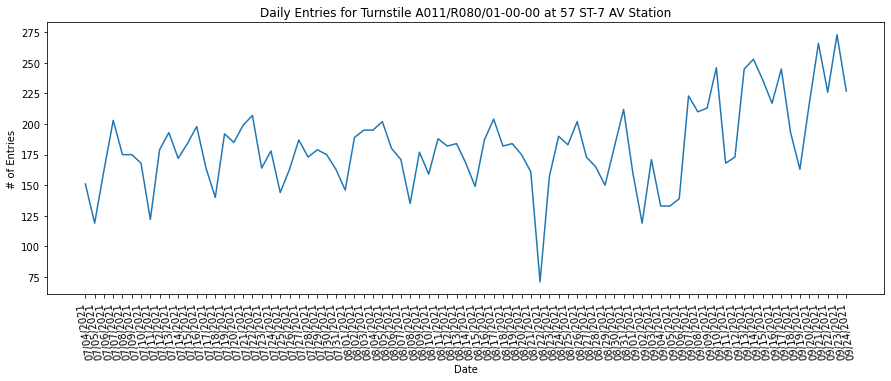

In [136]:

plt.figure(figsize=(15,5))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=100)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

In [107]:

station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
6966,57 ST-7 AV,07/04/2021,6775.0
6967,57 ST-7 AV,07/05/2021,6534.0
6968,57 ST-7 AV,07/06/2021,9380.0
6969,57 ST-7 AV,07/07/2021,9756.0
6970,57 ST-7 AV,07/08/2021,9909.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

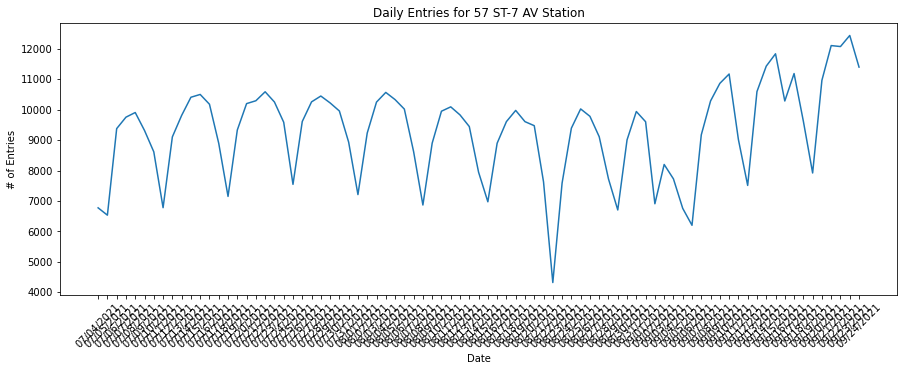

In [108]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

In [109]:
import numpy as np

In [110]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

<ipython-input-110-2a1e1cc4a8f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
<ipython-input-110-2a1e1cc4a8f2>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
<ipython-input-110-2a1e1cc4a8f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
6966,57 ST-7 AV,07/04/2021,6775.0,6,26
6967,57 ST-7 AV,07/05/2021,6534.0,0,27
6968,57 ST-7 AV,07/06/2021,9380.0,1,27
6969,57 ST-7 AV,07/07/2021,9756.0,2,27
6970,57 ST-7 AV,07/08/2021,9909.0,3,27


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

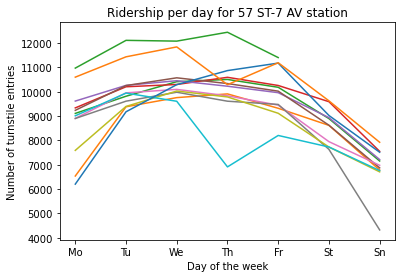

In [138]:

for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

(array([288.,  56.,  14.,   8.,   6.,   4.,   1.,   1.,   0.,   1.]),
 array([4.4600000e+02, 5.5257160e+05, 1.1046972e+06, 1.6568228e+06,
        2.2089484e+06, 2.7610740e+06, 3.3131996e+06, 3.8653252e+06,
        4.4174508e+06, 4.9695764e+06, 5.5217020e+06]),
 <BarContainer object of 10 artists>)

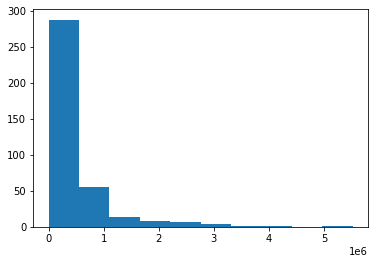

In [112]:
plt.hist(station_totals['DAILY_ENTRIES'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

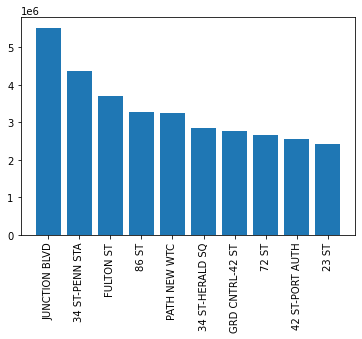

In [113]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

In [ ]:
[]